In [1]:
# Obucavanje se vrsi na sva tri (dva) segmenta, u zavisnosi od nacina snimanja
# Tesiranje alogritma se vrsi koriscenjem Stratified K fold cross validation
# Testirani modeli su: RF, SVM, GNB, KNN, LDA, QDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.metrics import classification_report

In [5]:
import pickle

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

In [8]:
dat_12_samples = pd.read_csv('/Features.csv',sep=',')
dat_8_samples = pd.read_csv('/Features_without_neutral.csv',sep=',')

In [9]:
temp = dat_12_samples.iloc[0,0]

In [10]:
for i in range(len(dat_12_samples)):
    temp = dat_12_samples.iloc[i,0]
    dat_12_samples.iloc[i,0] = temp[:-4]

In [11]:
for i in range(len(dat_8_samples)):
    temp = dat_8_samples.iloc[i,0]
    dat_8_samples.iloc[i,0] = temp[:-4]

In [12]:
temp1 = dat_12_samples['examinee'].value_counts()
temp2 = dat_8_samples['examinee'].value_counts()

In [13]:
dat = pd.concat([dat_12_samples,dat_8_samples])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
# with open('subject_ID.pkl', 'rb') as f:
#     le = pickle.load(f)

In [17]:
# subject_id = pd.DataFrame({'Subject': le.classes_, 'ID': range(len(le.classes_))}).to_excel('subject_ID.xlsx')

In [18]:
X = dat.drop('examinee',axis=1)
y = dat['examinee']

In [19]:
# with open('subject_ID.pkl', 'rb') as f:
#     le = pickle.load(f)
    
# y = le.transform(dat['examinee'])

In [20]:
le = LabelEncoder()

y = le.fit_transform(y)

In [21]:
for original_class, encoded_value in zip(le.classes_, range(len(le.classes_))):
    print(f"{original_class}: {encoded_value}")

ID0000: 0
ID0001: 1
ID0002: 2
ID0003: 3
ID0004: 4
ID0005: 5
ID0006: 6
ID0007: 7
ID0008: 8
ID0009: 9
ID0010: 10
ID0011: 11
ID0012: 12
ID0013: 13
ID0014: 14
ID0015: 15
ID0016: 16
ID0017: 17
ID0018: 18
ID0019: 19
ID0020: 20
ID0021: 21
ID0022: 22
ID0023: 23
ID0024: 24
ID0025: 25
ID0026: 26
ID0027: 27
ID0028: 28
ID0029: 29
ID0030: 30
ID0031: 31
ID0032: 32
ID0033: 33
ID0034: 34
ID0035: 35
ID0036: 36
ID0037: 37
ID0038: 38
ID0039: 39
ID0040: 40
ID0041: 41
ID0042: 42
ID0043: 43
ID0044: 44
ID0045: 45
ID0046: 46
ID0047: 47
ID0048: 48
ID0049: 49
ID0050: 50
ID0051: 51
ID0052: 52
ID0053: 53
ID0054: 54
ID0055: 55
ID0056: 56
ID0057: 57
ID0058: 58
ID0059: 59
ID0060: 60
ID0061: 61
ID0062: 62
ID0063: 63
ID0064: 64
ID0065: 65
ID0066: 66
ID0067: 67
ID0068: 68
ID0069: 69
ID0070: 70
ID0071: 71
ID0072: 72
ID0073: 73
ID0074: 74
ID0075: 75
ID0076: 76
ID0077: 77
ID0078: 78
ID0079: 79
ID0080: 80
ID0081: 81
ID0082: 82
ID0083: 83
ID0084: 84
ID0085: 85
ID0086: 86
ID0087: 87
ID0088: 88
ID0089: 89
ID0090: 90
ID0091: 9

In [22]:
# X_ECG = dat[['QRS_int','T_int','QT_int','RS_amp','RQ_amp','TT1_amp','TT2_amp','ECGcrest','RR']]

In [23]:
X.columns

Index(['QRS_int', 'T_int', 'QT_int', 'RC_int', 'RC_int2', 'BX_int', 'BX_int2',
       'RS_amp', 'RQ_amp', 'TT1_amp', 'TT2_amp', 'CB_amp', 'CX_amp',
       'ECGTcrest', 'ICGcrest', 'RR', 'CC'],
      dtype='object')

In [24]:
X_ECG = dat[['QRS_int','T_int','QT_int','RS_amp','RQ_amp','ECGTcrest','TT1_amp','TT2_amp','RR']]

In [25]:
# X_ICG = dat.drop(['QRS_int','T_int','QT_int','RS_amp','RQ_amp','TT1_amp','TT2_amp','ECGcrest','RR','examinee'],axis = 1)

In [26]:
X_ICG = dat[['RC_int','RC_int2','BX_int','BX_int2','CB_amp','CX_amp','ICGcrest','CC']]

In [27]:
X.columns

Index(['QRS_int', 'T_int', 'QT_int', 'RC_int', 'RC_int2', 'BX_int', 'BX_int2',
       'RS_amp', 'RQ_amp', 'TT1_amp', 'TT2_amp', 'CB_amp', 'CX_amp',
       'ECGTcrest', 'ICGcrest', 'RR', 'CC'],
      dtype='object')

In [28]:
X_ECG.columns

Index(['QRS_int', 'T_int', 'QT_int', 'RS_amp', 'RQ_amp', 'ECGTcrest',
       'TT1_amp', 'TT2_amp', 'RR'],
      dtype='object')

In [29]:
X_ICG.columns

Index(['RC_int', 'RC_int2', 'BX_int', 'BX_int2', 'CB_amp', 'CX_amp',
       'ICGcrest', 'CC'],
      dtype='object')

In [30]:
values, counts = np.unique(y,return_counts=True)

In [31]:
skf = StratifiedKFold(n_splits=4, shuffle=True) 

In [32]:
X = X

In [33]:
num_runs = 20

In [34]:
hyperparam_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_features": ['sqrt', 'log2'],
    "max_depth": np.arange(5, 15),
}

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rforest_scores = np.zeros((num_runs,4))
rforest = RandomForestClassifier(n_jobs=-1)
grid = GridSearchCV(estimator=rforest, param_grid=hyperparam_grid, cv=skf, n_jobs=-1)
grid.fit(X,y)
rforest_best_params = grid.best_params_

In [37]:
for i in range(num_runs):
    rforest = RandomForestClassifier(n_jobs=-1, **rforest_best_params)
    cv_scores = cross_val_score(rforest, X, y, cv=skf)
    rforest_scores[i,:] = cv_scores
rforest_scores = np.mean(rforest_scores,axis = 1)

In [38]:
print(rforest_best_params)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}


In [39]:
rforest_mean = np.mean(rforest_scores)
rforest_std = np.std(rforest_scores)
print('%f (%f)' % (rforest_mean,rforest_std))

0.970384 (0.001314)


In [40]:
from sklearn.svm import SVC

In [41]:
hyperparam_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [10, 1, 0.1, 0.01, 0.001,0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking': [True, False],
}

In [42]:
svm_scores = np.zeros((num_runs,4))
svm = SVC()
grid = GridSearchCV(estimator=svm, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.fit_transform(X),y)
svm_best_params = grid.best_params_

In [43]:
print(svm_best_params)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'shrinking': True}


In [44]:
for i in range(num_runs):
    svm = SVC(**svm_best_params)
    cv_scores = cross_val_score(svm, scaler.transform(X), y, cv=skf)
    svm_scores[i,:] = cv_scores
svm_scores = np.mean(svm_scores,axis = 1)

In [45]:
svm_mean = np.mean(svm_scores)
svm_std = np.std(svm_scores)
print('%f (%f)' % (svm_mean,svm_std))

0.931650 (0.003198)


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
hyperparam_grid = {'shrinkage':['auto',0,0.2,0.4,0.6,0.8,1],
                   'solver':['svd','lsqr','eigen']
                   }

In [48]:
lda_scores = np.zeros((num_runs,4))
lda = LinearDiscriminantAnalysis()
grid = GridSearchCV(estimator=lda, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.transform(X),y)
lda_best_params = grid.best_params_

In [49]:
print(lda_best_params)

{'shrinkage': 0, 'solver': 'lsqr'}


In [50]:
for i in range(num_runs):
    lda = LinearDiscriminantAnalysis(**lda_best_params)
    cv_scores = cross_val_score(lda, scaler.transform(X), y, cv=skf)
    lda_scores[i,:] = cv_scores
lda_scores = np.mean(lda_scores,axis = 1)

In [51]:
lda_mean = np.mean(lda_scores)
lda_std = np.std(lda_scores)
print('%f (%f)' % (lda_mean,lda_std))

0.955027 (0.001767)


In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [53]:
hyperparam_grid = [{'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}]

In [54]:
qda_scores = np.zeros((num_runs,4))
qda = QuadraticDiscriminantAnalysis()
grid = GridSearchCV(estimator=qda, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.transform(X),y)
qda_best_params = grid.best_params_

In [55]:
print(qda_best_params)

{'reg_param': 0.1}


In [56]:
for i in range(num_runs):
    qda = QuadraticDiscriminantAnalysis(**qda_best_params)
    cv_scores = cross_val_score(qda, scaler.transform(X), y, cv=skf)
    qda_scores[i,:] = cv_scores
qda_scores = np.mean(qda_scores,axis = 1)

In [57]:
qda_mean = np.mean(qda_scores)
qda_std = np.std(qda_scores)
print('%f (%f)' % (qda_mean,qda_std))

0.738323 (0.007359)


In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
hyperparam_grid = {
    'var_smoothing': np.logspace(0, -12, num=100)
    }

In [60]:
gnb_scores = np.zeros((num_runs,4))
gnb = GaussianNB()
grid = GridSearchCV(estimator=gnb, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.transform(X),y)
gnb_best_params = grid.best_params_

In [61]:
print(gnb_best_params)

{'var_smoothing': 0.01519911082952933}


In [62]:
for i in range(num_runs):
    gnb = GaussianNB(**gnb_best_params)
    cv_scores = cross_val_score(gnb, scaler.transform(X), y, cv=skf)
    gnb_scores[i,:] = cv_scores
gnb_scores = np.mean(gnb_scores,axis = 1)

In [63]:
gnb_mean = np.mean(gnb_scores)
gnb_std = np.std(gnb_scores)
print('%f (%f)' % (gnb_mean,gnb_std))

0.930462 (0.002574)


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
hyperparam_grid = {
    'n_neighbors': np.arange(1, 8, 1),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [66]:
knn_scores = np.zeros((num_runs,4))
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.transform(X),y)
knn_best_params = grid.best_params_

In [67]:
print(knn_best_params)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [68]:
for i in range(num_runs):
    gnb = KNeighborsClassifier(**knn_best_params)
    cv_scores = cross_val_score(knn, scaler.transform(X), y, cv=skf)
    knn_scores[i,:] = cv_scores
knn_scores = np.mean(knn_scores,axis = 1)

In [69]:
knn_mean = np.mean(knn_scores)
knn_std = np.std(knn_scores)
print('%f (%f)' % (knn_mean,knn_std))

0.828245 (0.003720)


In [70]:
from sklearn.neighbors import NearestCentroid

In [71]:
hyperparam_grid = {'shrink_threshold':np.arange(0,1.01,0.01),
                   'metric':['euclidean', 'manhattan']}

In [72]:
nc_scores = np.zeros((num_runs,4))
nc = NearestCentroid()
grid = GridSearchCV(estimator=nc, param_grid=hyperparam_grid, cv=skf)
grid.fit(scaler.transform(X),y)
nc_best_params = grid.best_params_

In [73]:
print(nc_best_params)

{'metric': 'manhattan', 'shrink_threshold': 0.01}


In [74]:
for i in range(num_runs):
    nc = NearestCentroid(**nc_best_params)
    cv_scores = cross_val_score(nc, scaler.transform(X), y, cv=skf)
    nc_scores[i,:] = cv_scores
nc_scores = np.mean(nc_scores,axis = 1)

In [75]:
nc_mean = np.mean(nc_scores)
nc_std = np.std(nc_scores)
print('%f (%f)' % (nc_mean,nc_std))

0.826508 (0.003409)


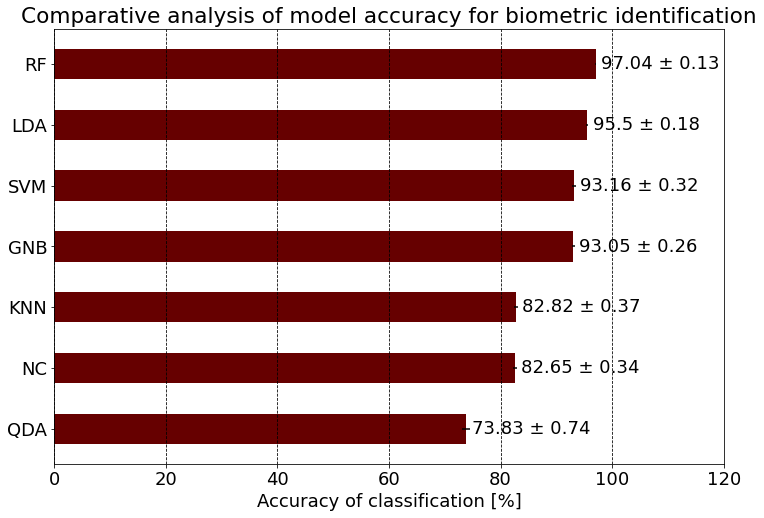

In [76]:
labels = ['RF', 'SVM', 'GNB', 'KNN', 'LDA', 'QDA', 'NC']
alg_means = np.array([rforest_mean, svm_mean, gnb_mean, knn_mean, lda_mean, qda_mean, nc_mean])*100
alg_stds = np.array([rforest_std, svm_std, gnb_std, knn_std, lda_std, qda_std, nc_std])*100

# Sort the means and labels in descending order
sorted_indices = np.argsort(alg_means)
sorted_means = alg_means[sorted_indices]
sorted_stds = alg_stds[sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

plt.rcParams.update({'font.size': 18})
y_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(y_pos, sorted_means,
        xerr=sorted_stds,
        align='center',
        height=0.5,
        color='#660000')
ax.set_xlabel('Accuracy of classification [%]')
ax.xaxis.grid(True, linestyle='--', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_labels)
ax.set_title('Comparative analysis of model accuracy for biometric identification')
ax.xaxis.grid(True)
ax.set_xlim((0,120))

for i, v in enumerate(sorted_means):
    ax.text(v + 1, i, f"{round(v, 2)} ± {round(sorted_stds[i], 2)}", color='black', va='center')
    
plt.show()

In [77]:
best_params_all = {'RF':rforest_best_params,'SVM':svm_best_params,'LDA':lda_best_params,'GNB':gnb_best_params}

In [78]:
with open('best_params_all.pkl', 'wb') as f:
    pickle.dump(best_params_all, f)